In [1]:
import torch

In [8]:
from PIL import Image
import numpy as np

image = Image.open("./a01-000u.png").convert("RGB")
image.size


(2479, 3542)

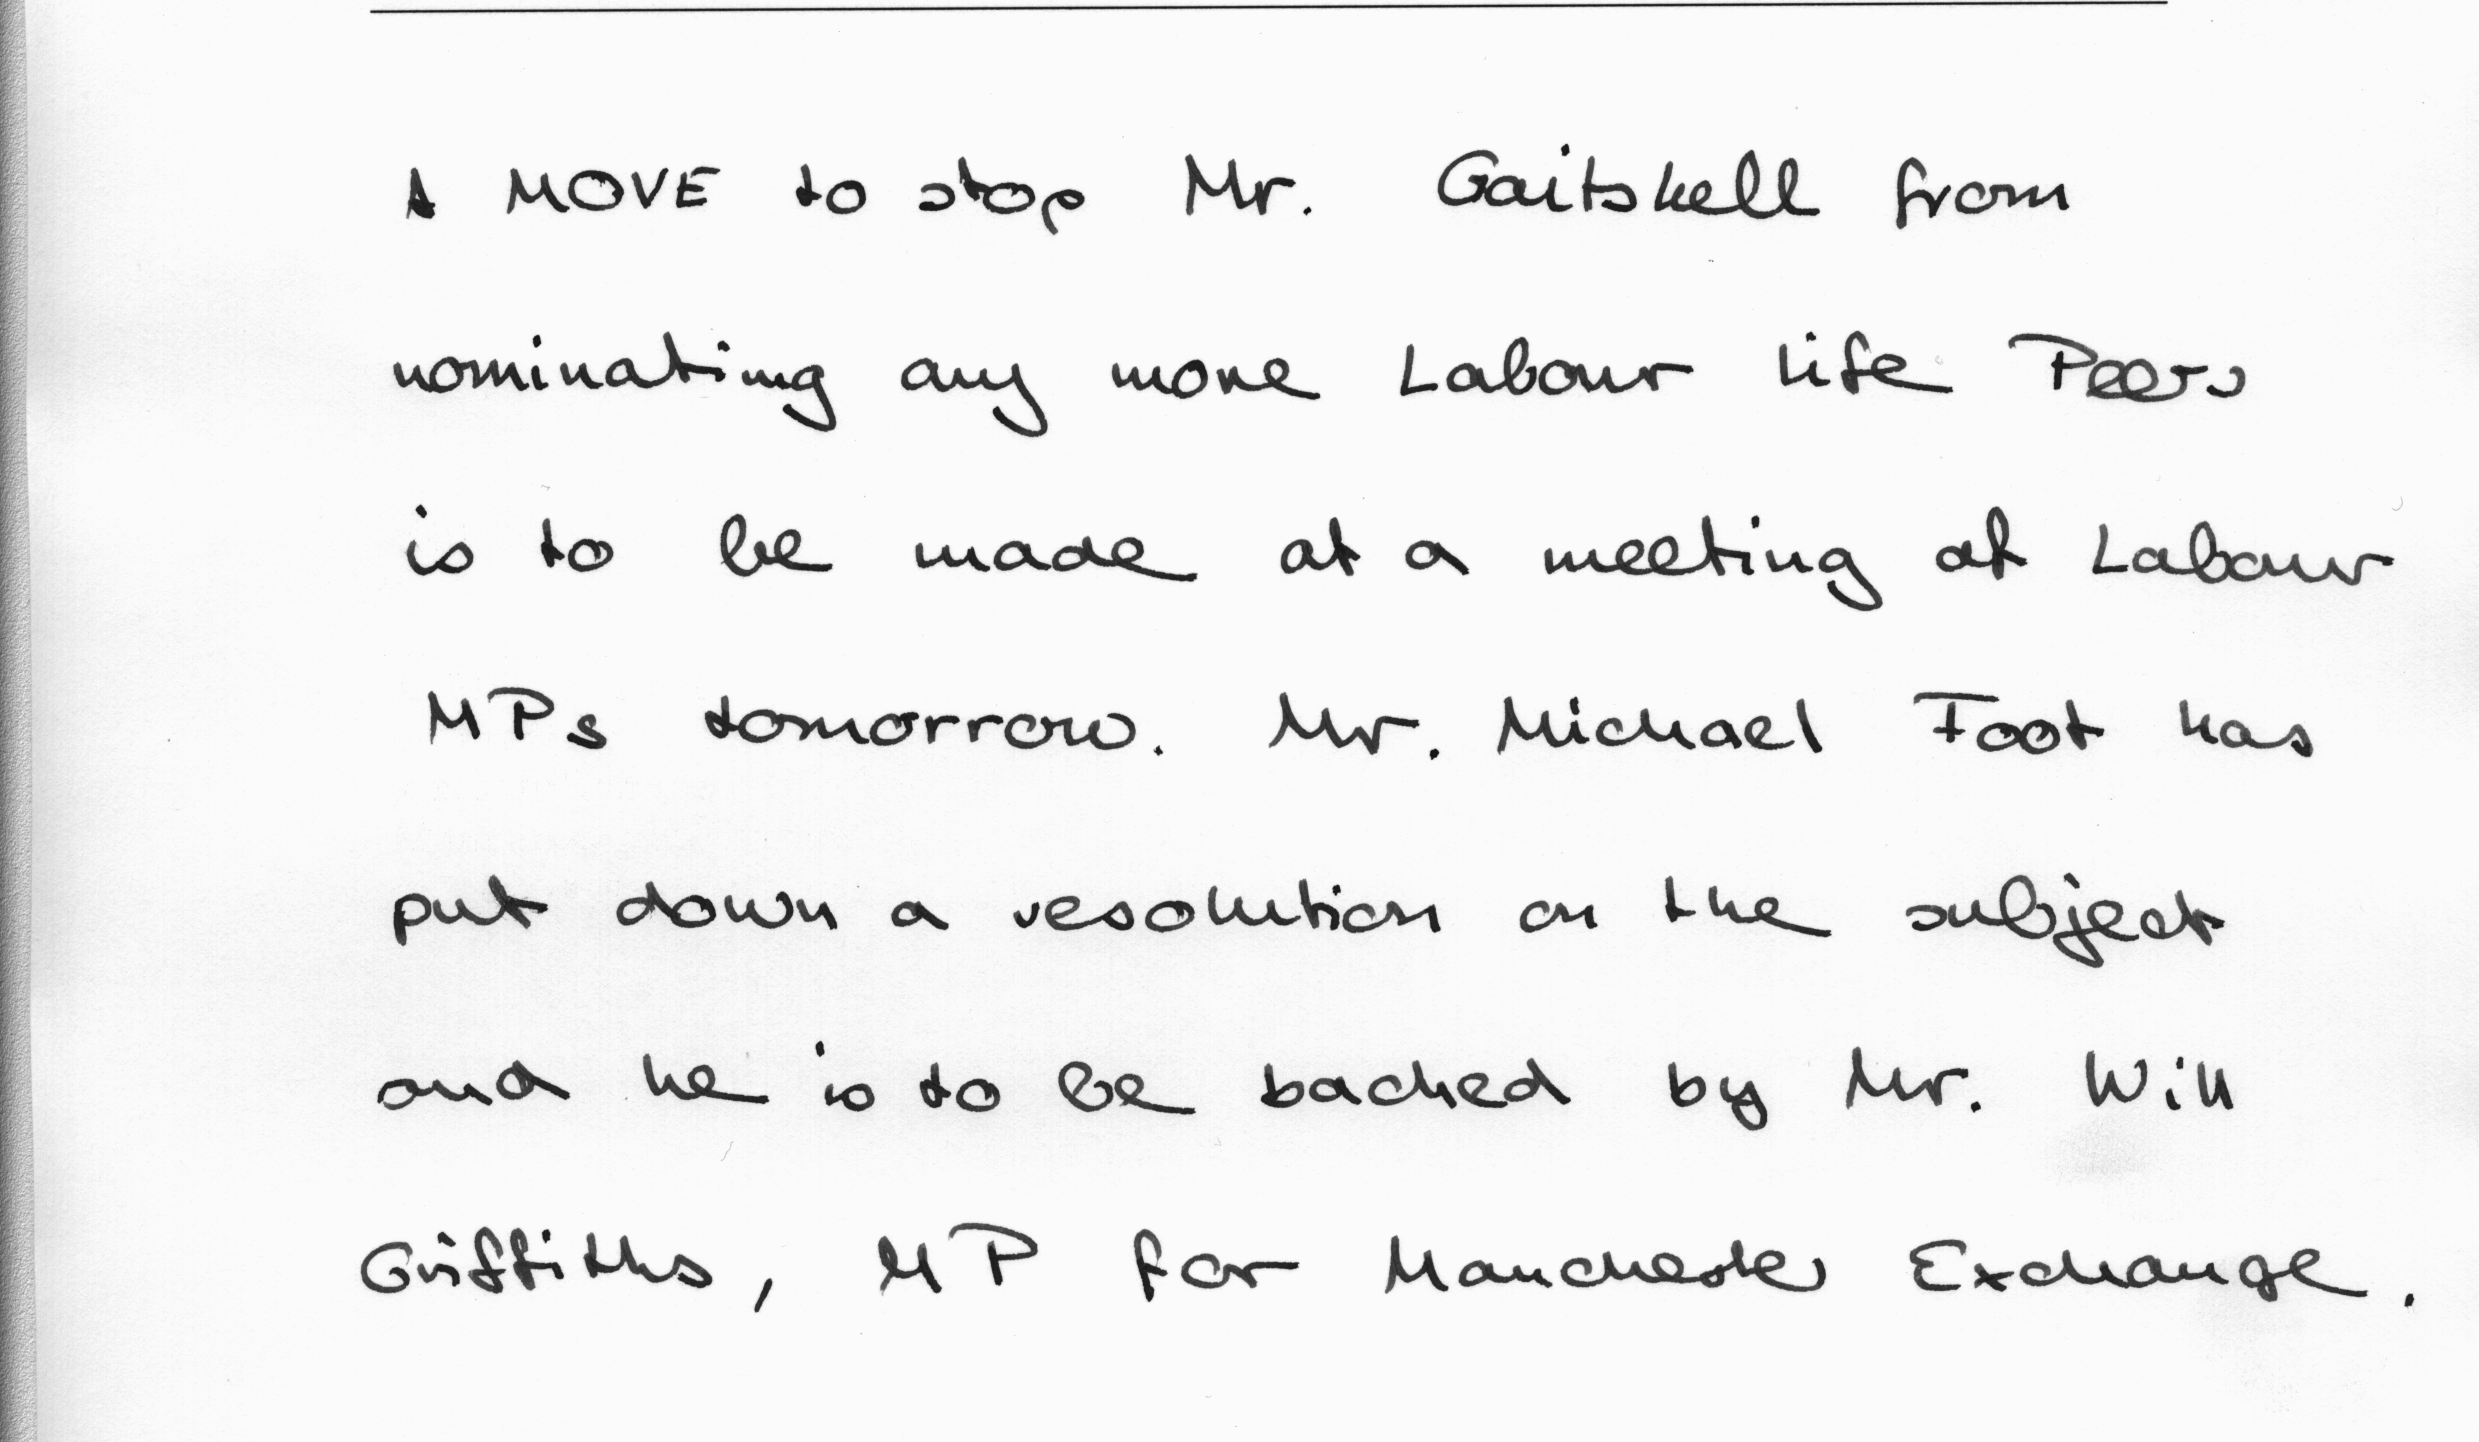

In [10]:
cropped_image = image.crop((0, 600, 2479, 2042)).convert('RGB')
cropped_image


torch.Size([1442, 2479, 3])
torch.Size([1442, 2479])


<BarContainer object of 1442 artists>

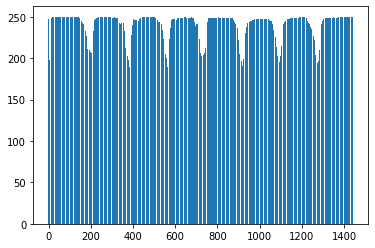

In [25]:
arr = torch.tensor(np.array(cropped_image)).to(torch.float)
# average grayscale
print(arr.shape)
arr = torch.mean(arr, 2) # turns it into graysclae
print(arr.shape)
arr = torch.mean(arr, 1)
arr.shape

import matplotlib.pyplot as plt

plt.bar(range(1442), arr)

In [58]:
from transformers import TrOCRProcessor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')


In [59]:
pixel_values = processor(images=cropped_image, return_tensors='pt').pixel_values

In [60]:
pixel_values

tensor([[[[ 0.0980,  0.2941,  0.4196,  ...,  0.9686,  0.9686,  0.9686],
          [ 0.1373,  0.2863,  0.4588,  ...,  0.9686,  0.9686,  0.9686],
          [ 0.1059,  0.2941,  0.4667,  ...,  0.9686,  0.9686,  0.9686],
          ...,
          [-0.0510,  0.1686,  0.3255,  ...,  0.9686,  0.9686,  0.9686],
          [-0.0745,  0.1373,  0.3255,  ...,  0.9686,  0.9686,  0.9686],
          [-0.0510,  0.1373,  0.3490,  ...,  0.9686,  0.9686,  0.9686]],

         [[ 0.0980,  0.2941,  0.4196,  ...,  0.9686,  0.9686,  0.9686],
          [ 0.1373,  0.2863,  0.4588,  ...,  0.9686,  0.9686,  0.9686],
          [ 0.1059,  0.2941,  0.4667,  ...,  0.9686,  0.9686,  0.9686],
          ...,
          [-0.0510,  0.1686,  0.3255,  ...,  0.9686,  0.9686,  0.9686],
          [-0.0745,  0.1373,  0.3255,  ...,  0.9686,  0.9686,  0.9686],
          [-0.0510,  0.1373,  0.3490,  ...,  0.9686,  0.9686,  0.9686]],

         [[ 0.0980,  0.2941,  0.4196,  ...,  0.9686,  0.9686,  0.9686],
          [ 0.1373,  0.2863,  

In [61]:
pixel_values.size()

torch.Size([1, 3, 384, 384])

In [62]:
pixel_values = torch.squeeze(pixel_values)
pixel_values.size

<function Tensor.size>

In [63]:
pixel_vect = torch.mean(torch.mean(pixel_values, 0), 0)

<BarContainer object of 384 artists>

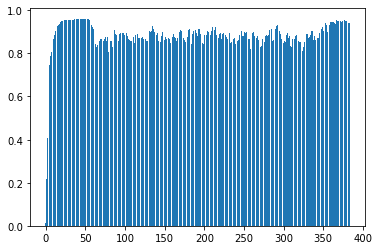

In [64]:
import matplotlib.pyplot as plt

plt.bar(range(384), pixel_vect)